# Word embeddings

### Resources

- Word2vec (Mikolov et al., 2013): https://code.google.com/archive/p/word2vec/
- Fasttext: http://www.fasttext.cc/ (+sub-word information, +multilingual)
- Glove (Pennington, Socher, Manning, 2014): http://nlp.stanford.edu/projects/glove/



Gensim documentation: https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec

Embeddings visualizer: https://projector.tensorflow.org/


## Loading and using word embeddings

In [ ]:
import gensim


In [ ]:
# Show all available models in gensim-data
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
# Download the "GloVe 25" embeddings
embeddings_twitter = gensim.downloader.load('glove-twitter-200')
embeddings = gensim.downloader.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 758.5/758.5MB downloaded
[==================================================] 100.0% 958.5/958.4MB downloaded


In [ ]:
# embeddings = gensim.downloader.load('fasttext-wiki-news-subwords-300')

In [ ]:
print(len(embeddings.index_to_key))
print(len(embeddings_twitter.index_to_key))

999999
1193514


In [ ]:
embeddings.get_vector('cat')

array([ 4.7426e-02, -4.2203e-02,  2.8491e-02, -4.4481e-02, -2.6467e-02,
        3.3557e-02,  1.7173e-01, -1.4773e-01,  7.1133e-02,  3.8385e-02,
       -7.9921e-02, -1.3236e-03,  1.6185e-01, -1.6389e-01, -6.5456e-02,
        2.7030e-02,  1.2193e-01, -7.1632e-02,  7.9642e-02, -1.4602e-01,
        1.0369e-02, -1.0468e-01,  3.6734e-02,  7.9116e-02,  1.8241e-01,
       -2.4902e-03,  1.3818e-02,  1.2378e-01,  1.7348e-04,  1.6646e-02,
       -1.3513e-02, -7.5532e-02,  1.0060e-01,  7.1226e-02, -2.7468e-02,
       -7.8517e-02,  3.3769e-02, -1.6082e-01, -2.2747e-02, -1.3238e-01,
        1.1198e-02, -1.2838e-01, -5.8910e-02, -5.1399e-02,  3.9177e-02,
        5.8243e-02,  2.2071e-02,  7.1876e-02,  2.8166e-02, -1.8918e-02,
        3.4445e-02,  1.5664e-01,  6.9836e-02, -2.0858e-01,  2.4413e-03,
       -8.9110e-02, -6.0705e-02,  6.5106e-02, -8.3036e-02,  1.7491e-02,
       -3.4527e-02, -2.5026e-01,  1.8777e-01, -3.6235e-02,  1.2452e-01,
        2.4356e-02, -4.4517e-03,  5.5572e-02, -8.6161e-03, -1.61

In [ ]:
embeddings.most_similar('cat')

[('cats', 0.8368596434593201),
 ('housecat', 0.767471194267273),
 ('-cat', 0.7602992057800293),
 ('dog', 0.7502298951148987),
 ('kitten', 0.7480817437171936),
 ('feline', 0.7353992462158203),
 ('super-cat', 0.7305206060409546),
 ('supercat', 0.7163284420967102),
 ('pet', 0.7090284824371338),
 ('moggy', 0.7057286500930786)]

In [ ]:
embeddings_twitter.most_similar('cat')

[('dog', 0.8324302434921265),
 ('cats', 0.7685185074806213),
 ('kitty', 0.750445544719696),
 ('kitten', 0.7489697933197021),
 ('pet', 0.7319862842559814),
 ('puppy', 0.7023192644119263),
 ('dogs', 0.7016381621360779),
 ('animal', 0.6421106457710266),
 ('bear', 0.6309184432029724),
 ('meow', 0.6304775476455688)]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(
    embeddings.get_vector('cat').reshape(1,-1),
    embeddings.get_vector('kitten').reshape(1,-1)
    )[0][0]

0.7480817

In [ ]:
import numpy as np

In [ ]:
exar = np.array([1,2,3,4])
exar.reshape(-1, 1)
# Documentation: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

array([[1],
       [2],
       [3],
       [4]])

In [ ]:
exar.reshape??

In [ ]:
embeddings.similarity('cat', 'kitten')

0.74808174

In [ ]:
embeddings.similarity('cat', 'puppy')

0.6651119

In [ ]:
embeddings.closer_than('cat', 'puppy')

['dog',
 'cats',
 'Cat',
 'pet',
 'kitten',
 'feline',
 'kitty',
 'subcat',
 'felines',
 'beagle',
 'sub-cat',
 'tomcat',
 'moggy',
 'housecat',
 'supercat',
 'moggie',
 'she-cat',
 're-cat',
 'cat-',
 'kittypet',
 'super-cat',
 '-cat']

#### Synonymy vs relatedness

In [ ]:
embeddings.similarity('uncle', 'sister')

0.7174434

In [ ]:
embeddings_twitter.similarity('uncle', 'sister')

0.6477544

In [ ]:
embeddings_twitter.similarity('sibling', 'sister')

0.517647

In [ ]:
embeddings_twitter.similarity('good', 'bad')

0.7983508

In [ ]:
embeddings.similarity('good', 'bad')

0.8503089

In [ ]:
embeddings.similarity('sister', 'sibling')

0.76012087

In [ ]:
embeddings.similarity('sister', 'mother')

0.76116526

In [ ]:
embeddings.similarity('Monday', 'Sunday')

0.85126

#### Normalization

In [ ]:
embeddings.most_similar("defenitly")

[('defenitely', 0.8840630650520325),
 ('defenetly', 0.8451886177062988),
 ('defently', 0.8433688282966614),
 ('definitly', 0.7705455422401428),
 ('definetly', 0.7526832818984985),
 ('politly', 0.7457023859024048),
 ('defnitely', 0.7323918342590332),
 ('probebly', 0.7254762649536133),
 ('definatly', 0.7249115109443665),
 ('usuallly', 0.7225544452667236)]

In [ ]:
embeddings.most_similar("hiii")

[('hiiii', 0.942829430103302),
 ('Hiii', 0.8571421504020691),
 ('Hiiii', 0.8538976311683655),
 ('hii', 0.7178280353546143),
 ('iiii', 0.7104865908622742),
 ('plzzz', 0.6919779181480408),
 ('plzzzz', 0.6852996945381165),
 ('hhh', 0.6836094260215759),
 ('wazzup', 0.6829248070716858),
 ('plzz', 0.6775454878807068)]

#### Word analogies

In [ ]:
# king - man + woman
embeddings.most_similar_cosmul(positive=['king', 'woman'], negative=['man'])

[('queen', 0.9390855431556702),
 ('queen-mother', 0.9078598618507385),
 ('king-', 0.8828966617584229),
 ('queen-consort', 0.882541835308075),
 ('child-king', 0.8680858016014099),
 ('monarch', 0.8670082688331604),
 ('ex-queen', 0.8654637932777405),
 ('princess', 0.8628991842269897),
 ('queen-', 0.8613532781600952),
 ('boy-king', 0.860465943813324)]

In [ ]:
# king - man + woman
embeddings.most_similar_cosmul(positive=['king', 'woman'], negative=['man'])

[('queen', 0.9390855431556702),
 ('queen-mother', 0.9078598618507385),
 ('king-', 0.8828966617584229),
 ('queen-consort', 0.882541835308075),
 ('child-king', 0.8680858016014099),
 ('monarch', 0.8670082688331604),
 ('ex-queen', 0.8654637932777405),
 ('princess', 0.8628991842269897),
 ('queen-', 0.8613532781600952),
 ('boy-king', 0.860465943813324)]

In [ ]:
# Rome - Italy + France
embeddings.most_similar_cosmul(positive=['Rome', 'France'], negative=['Italy'])

[('Paris', 0.9433915019035339),
 ('Meaux', 0.8968006372451782),
 ('Avignon', 0.8785353302955627),
 ('Saint-Denis', 0.8744450807571411),
 ('Rouen', 0.8729321956634521),
 ('Lyon', 0.8724958300590515),
 ('Louville', 0.8714753985404968),
 ('Toulouse', 0.8713099360466003),
 ('Beauvais', 0.8704253435134888),
 ('Blois', 0.8698782920837402)]

In [ ]:
# pasta - Italian + Romanian
embeddings.most_similar_cosmul(positive=['pasta', 'Romanian'], negative=['Italian'])

[('polenta', 0.7852737307548523),
 ('bulgar', 0.7823466658592224),
 ('bulgur', 0.7699621915817261),
 ('babka', 0.766016960144043),
 ('soup', 0.7643554210662842),
 ('mămăligă', 0.7633044719696045),
 ('cereal', 0.7588525414466858),
 ('pelmeni', 0.7585715651512146),
 ('masa', 0.7559653520584106),
 ('tin', 0.7554841041564941)]

In [ ]:
# cat - dog + puppy
embeddings.most_similar_cosmul(positive=['cat', 'puppy'], negative=['dog'])

[('kitten', 0.9267358779907227),
 ('kitty', 0.8846307396888733),
 ('cats', 0.8722013235092163),
 ('kittens', 0.8703644871711731),
 ('kitties', 0.8619921803474426),
 ('kitteh', 0.8562358021736145),
 ('housecat', 0.8552347421646118),
 ('moggy', 0.8512866497039795),
 ('-cat', 0.8492761850357056),
 ('moggie', 0.847593367099762)]

In [ ]:
# purple - blue + yellow
# green - blue + red?
embeddings.most_similar_cosmul(positive=['purple', 'yellow'], negative=['blue'])

[('orange', 0.9281182289123535),
 ('green-yellow', 0.9220715761184692),
 ('pink', 0.9197203516960144),
 ('orange-yellow', 0.9192143678665161),
 ('white-yellow', 0.9170408844947815),
 ('red-yellow', 0.9141272306442261),
 ('purple-blue', 0.9109879732131958),
 ('purple-red', 0.9094882607460022),
 ('yellow-orange', 0.9063596725463867),
 ('yellow-green', 0.9045568108558655)]

In [ ]:
embeddings_twitter.most_similar_cosmul(positive=['brother', 'woman'], negative=['man'])

[('sister', 0.9794360399246216),
 ('daughter', 0.9412024617195129),
 ('mother', 0.9372841715812683),
 ('mom', 0.9262226223945618),
 ('husband', 0.91740882396698),
 ('friend', 0.9102033376693726),
 ('wife', 0.9087694883346558),
 ('dad', 0.9083817005157471),
 ('sisters', 0.9073351621627808),
 ('father', 0.9037760496139526)]

In [ ]:
embeddings_twitter.most_similar_cosmul(positive=['cat', 'puppy'], negative=['dog'])

[('kitten', 0.9388771653175354),
 ('kitty', 0.9139494895935059),
 ('pup', 0.8514729738235474),
 ('puppies', 0.8475602269172668),
 ('kittens', 0.8263034224510193),
 ('pug', 0.8220088481903076),
 ('cute', 0.8175343871116638),
 ('cats', 0.8136031031608582),
 ('husky', 0.8109297156333923),
 ('pet', 0.8099460005760193)]

In [ ]:
# computer_progammer - man + woman ... homemaker?
embeddings.most_similar_cosmul(positive=['programmer', 'woman'], negative=['man'])

[('non-programmer', 0.8644444346427917),
 ('programmers', 0.8571239113807678),
 ('Programmer', 0.8313320875167847),
 ('non-programmers', 0.8269446492195129),
 ('writer', 0.8260435461997986),
 ('coder', 0.8254762291908264),
 ('programer', 0.8239933848381042),
 ('nonprogrammers', 0.8238458633422852),
 ('web-designer', 0.819828987121582),
 ('researcher', 0.8139449954032898)]

In [ ]:
embeddings.doesnt_match((('dog', 'cat', 'mouse', 'cake')))

'cake'

#### Multilingual embeddings & false friends

In [ ]:
!wget https://dl.fbaipublicfiles.com/arrival/vectors/wiki.multi.en.vec # English embeddings, prealigned
!wget https://dl.fbaipublicfiles.com/arrival/vectors/wiki.multi.es.vec # Spanish embeddings, prealigned

--2023-04-09 18:46:32--  https://dl.fbaipublicfiles.com/arrival/vectors/wiki.multi.en.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 99.84.160.46, 99.84.160.80, 99.84.160.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|99.84.160.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 628614720 (599M) [text/plain]
Saving to: ‘wiki.multi.en.vec’

wiki.multi.en.vec   100%[===================>] 599.49M   128MB/s    in 4.7s    

2023-04-09 18:46:37 (128 MB/s) - ‘wiki.multi.en.vec’ saved [628614720/628614720]

--2023-04-09 18:46:37--  https://dl.fbaipublicfiles.com/arrival/vectors/wiki.multi.es.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 99.84.160.46, 99.84.160.80, 99.84.160.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|99.84.160.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 628826336 (600M) [text/plain]
Saving to: ‘wiki.multi.es.vec’

wiki.multi.es.vec  

Loading pretrained embeddings from local files

In [ ]:
from gensim.models import KeyedVectors
en_model = KeyedVectors.load_word2vec_format('wiki.multi.en.vec')  # Watch out for your RAM...
es_model = KeyedVectors.load_word2vec_format('wiki.multi.es.vec')


In [ ]:
embarrassed_vec = en_model.get_vector("embarassed")
pregnant_vec = en_model.get_vector("pregnant")
embarazada_vec = es_model.get_vector("embarazada")

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity([embarrassed_vec, pregnant_vec, embarazada_vec])

words = ("embarrassed", "pregnant", "embarazada")
print("%27s %15s %15s" % words)
for i, row in enumerate(similarity_matrix):
  print("%15s %.13f %.13f %.13f" % (words[i], *row))

                embarrassed        pregnant      embarazada
    embarrassed 0.9999999403954 0.2995810210705 0.3134102821350
       pregnant 0.2995810210705 1.0000000000000 0.8302524089813
     embarazada 0.3134102821350 0.8302524089813 1.0000000000000


In [ ]:
es_model.similar_by_vector(embarrassed_vec)

[('parecerme', 0.6807215213775635),
 ('insultarme', 0.6778432726860046),
 ('sinceramente', 0.675748884677887),
 ('discúlpame', 0.6600538492202759),
 ('equivocarme', 0.6517462134361267),
 ('digo', 0.6503289937973022),
 ('diciéndome', 0.6467952132225037),
 ('disculpo', 0.6451693177223206),
 ('disculparme', 0.6407719850540161),
 ('ridículo', 0.6402308940887451)]

In [ ]:
en_model.similar_by_vector(embarazada_vec)

[('pregnant', 0.8302525877952576),
 ('miscarried', 0.715323269367218),
 ('miscarries', 0.6865615844726562),
 ('miscarriage', 0.664211094379425),
 ('stepmother', 0.6626667976379395),
 ('fiancé', 0.6595430970191956),
 ('mother', 0.6589699387550354),
 ('stepdaughter', 0.6581923365592957),
 ('pregnancy', 0.6562281250953674),
 ('distraught', 0.6525552868843079)]

## Training embeddings

In [ ]:
gensim.models.Word2Vec(sentences=None, corpus_file=None, # Your corpus here!
                                vector_size=100, alpha=0.025, window=5, min_count=5,
                                max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0,
                                negative=5, ns_exponent=0.75, cbow_mean=1, null_word=0, trim_rule=None,
                                sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(),
                                max_final_vocab=None)


In [ ]:
gensim.models.Word2Vec??

In [ ]:
sentences = [["cat", "say", "meow"], ["dog", "say", "woof"]]
model = gensim.models.Word2Vec(sentences, min_count=1)

In [ ]:
model.wv.similarity('dog', 'cat')

0.17018887

In [ ]:
model.wv.get_vector('cat')

array([-0.00713902,  0.00124103, -0.00717672, -0.00224462,  0.0037193 ,
        0.00583312,  0.00119818,  0.00210273, -0.00411039,  0.00722533,
       -0.00630704,  0.00464722, -0.00821997,  0.00203647, -0.00497705,
       -0.00424769, -0.00310898,  0.00565521,  0.0057984 , -0.00497465,
        0.00077333, -0.00849578,  0.00780981,  0.00925729, -0.00274233,
        0.00080022,  0.00074665,  0.00547788, -0.00860608,  0.00058446,
        0.00686942,  0.00223159,  0.00112468, -0.00932216,  0.00848237,
       -0.00626413, -0.00299237,  0.00349379, -0.00077263,  0.00141129,
        0.00178199, -0.0068289 , -0.00972481,  0.00904058,  0.00619805,
       -0.00691293,  0.00340348,  0.00020606,  0.00475375, -0.00711994,
        0.00402695,  0.00434743,  0.00995737, -0.00447374, -0.00138926,
       -0.00731732, -0.00969783, -0.00908026, -0.00102275, -0.00650329,
        0.00484973, -0.00616403,  0.00251919,  0.00073944, -0.00339215,
       -0.00097922,  0.00997913,  0.00914589, -0.00446183,  0.00

In [ ]:
model.wv.save_word2vec_format("cats_model.bin")

In [ ]:
loaded_model = gensim.models.KeyedVectors.load_word2vec_format("cats_model.bin")

In [ ]:
loaded_model.index_to_key # vocabulary

['say', 'woof', 'dog', 'meow', 'cat']

In [ ]:
loaded_model.similarity('dog', 'cat')

0.17018887

# Contextual embeddings and language models

In [ ]:
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.2 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from transformers import BertModel, BertTokenizer

**Disclaimer**: Each pretrained transformer model (e.g. BERT base) has its own tokenizer, where the vocabulary of types (possible values for the tokens) is determined automatically based on the corpus and might not all be words in the dictionary (also includes subwords etc). You can learn more about transformers using the resources below, or at next year's NLP courses.

In [ ]:
# Load pre-trained model
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
model = BertModel.from_pretrained('bert-base-cased', return_dict=True)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


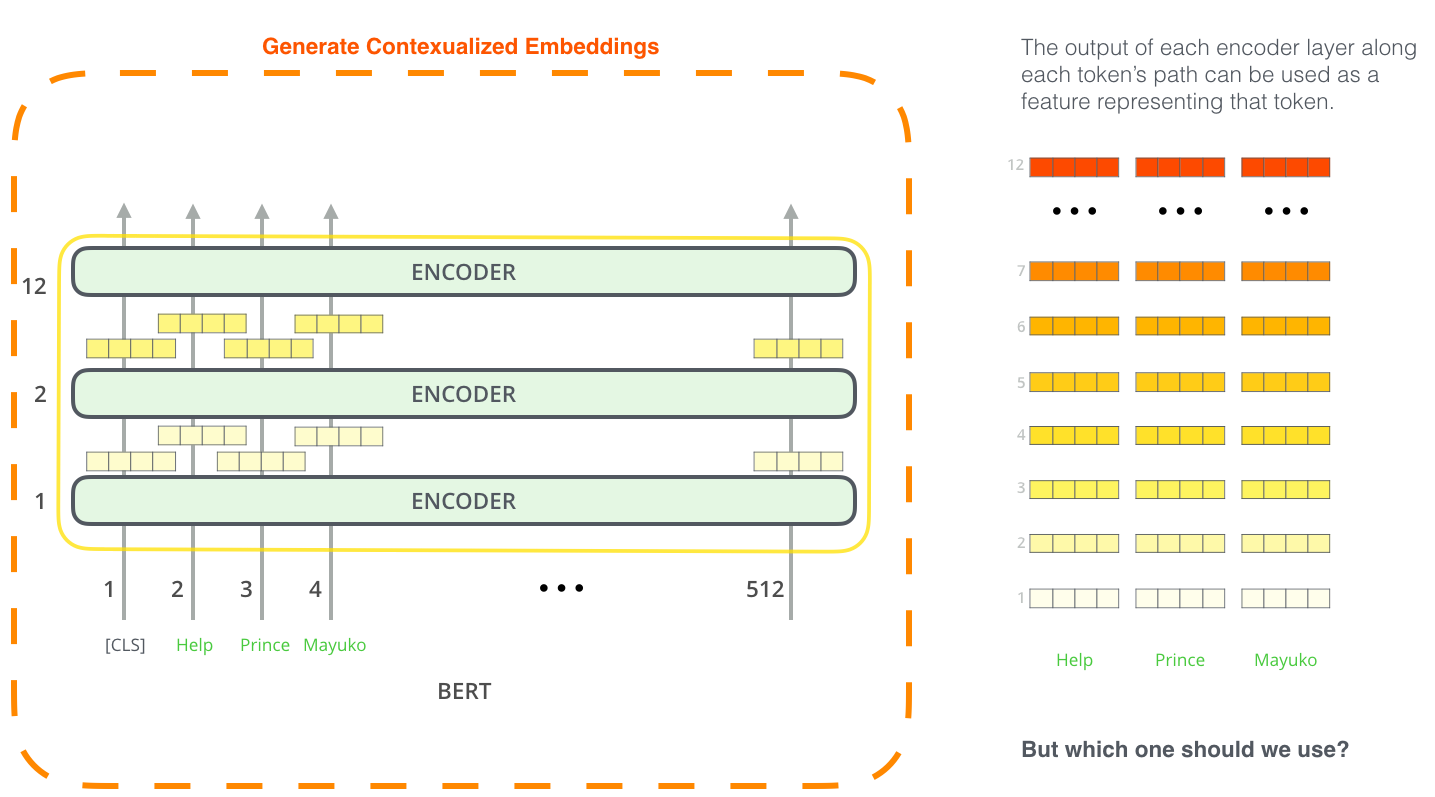

We want our model to return the hidden states, so we can capture them. The output_hidden_states parameter needs to be set to True for this.

There are 13 hidden states, the first corresponding to the embedding (projecting the vocabulary word to the (768,) embedding) and the rest corresponding to the 12 layers in the BERT-base model.

Output of each hidden state is (batch_size, number_of_tokens, 768).

Additional visualizations: https://jalammar.github.io/illustrated-bert/

In [ ]:
text = "I never acted in a play before."
inputs = tokenizer(text, return_tensors="pt")
outputs = model(**inputs, output_hidden_states=True)

In [ ]:
inputs

{'input_ids': tensor([[ 101,  146, 1309, 5376, 1107,  170, 1505, 1196,  119,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
outputs


BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.6465, -0.0340, -0.0343,  ..., -0.2017,  0.4150, -0.0688],
         [ 0.5861, -0.4964,  0.3969,  ..., -0.0649,  0.0623,  0.3182],
         [ 0.3198, -0.0435, -0.3961,  ...,  0.5159, -0.0444, -0.0523],
         ...,
         [ 0.3881, -0.5949,  0.0154,  ...,  0.0614,  0.3631, -0.2837],
         [ 0.5163, -0.2328, -0.0715,  ..., -0.1547,  0.1601, -0.1654],
         [ 0.8123,  0.1996, -0.2672,  ..., -0.4530,  0.1853, -0.3697]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-6.8066e-01,  4.4834e-01,  9.9995e-01, -9.9714e-01,  9.7919e-01,
          8.8241e-01,  9.9458e-01, -9.9277e-01, -9.8259e-01, -7.1344e-01,
          9.9216e-01,  9.9932e-01, -9.9824e-01, -9.9990e-01,  8.6363e-01,
         -9.9137e-01,  9.9463e-01, -6.2191e-01, -9.9998e-01, -8.6428e-01,
         -4.8440e-01, -9.9994e-01,  3.3618e-01,  9.7413e-01,  9.8518e-01,
          1.1825e-02,  9.9423e-01,  9.9998e-01,  9.4406e-01, -4.143

In [ ]:
len(outputs.hidden_states)


13

In [ ]:
for k in outputs:
  print(k)
  try:
    print(type(outputs[k]), outputs[k].shape)
  except:
    for t in outputs[k]:
      print(type(t), t.shape)

last_hidden_state
<class 'torch.Tensor'> torch.Size([1, 10, 768])
pooler_output
<class 'torch.Tensor'> torch.Size([1, 768])
hidden_states
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])


`hidden_states` contains intermediary layer outputs.

`last_hidden_state` contains the final output, with a 768-sized embedding for each input word.

`pooler_output` combines the word embeddings from the last hidden state into one sentence-level output.

For retrieving word embeddings we will use `last_hidden_state`.

In [ ]:

# first hidden layer
outputs.hidden_states[0].size()

# last hidden layer
outputs.hidden_states[-1].size()

torch.Size([1, 10, 768])

In [ ]:

embedding = model.embeddings.word_embeddings
E = embedding.weight
E.size()

torch.Size([28996, 768])

In [ ]:
def bert_text_preparation(text, tokenizer):
    """Preparing the input for BERT

    Takes a string argument and performs
    pre-processing like adding special tokens,
    tokenization, tokens to ids, and tokens to
    segment ids. All tokens are mapped to seg-
    ment id = 1.

    Args:
        text (str): Text to be converted
        tokenizer (obj): Tokenizer object
            to convert text into BERT-re-
            adable tokens and ids

    Returns:
        list: List of BERT-readable tokens
        obj: Torch tensor with token ids
        obj: Torch tensor segment ids


    """
    marked_text = "[CLS] " + text + " [SEP]"
    tokenized_text = tokenizer.tokenize(marked_text)
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    segments_ids = [1]*len(indexed_tokens)

    # Convert inputs to PyTorch tensors
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensors = torch.tensor([segments_ids])

    return tokenized_text, tokens_tensor, segments_tensors

In [ ]:
bert_text_preparation("I like to play football.", tokenizer)

(['[CLS]', 'I', 'like', 'to', 'play', 'football', '.', '[SEP]'],
 tensor([[ 101,  146, 1176, 1106, 1505, 1709,  119,  102]]),
 tensor([[1, 1, 1, 1, 1, 1, 1, 1]]))

In [ ]:
bert_text_preparation("I never acted in a play before.", tokenizer)

(['[CLS]', 'I', 'never', 'acted', 'in', 'a', 'play', 'before', '.', '[SEP]'],
 tensor([[ 101,  146, 1309, 5376, 1107,  170, 1505, 1196,  119,  102]]),
 tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]))

In [ ]:
def get_bert_embeddings(tokens_tensor, segments_tensors, model):
    """Get embeddings from an embedding model

    Args:
        tokens_tensor (obj): Torch tensor size [n_tokens]
            with token ids for each token in text
        segments_tensors (obj): Torch tensor size [n_tokens]
            with segment ids for each token in text
        model (obj): Embedding model to generate embeddings
            from token and segment ids

    Returns:
        list: List of list of floats of size
            [n_tokens, n_embedding_dimensions]
            containing embeddings for each token

    """

    # Gradient calculation id disabled
    # Model is in inference mode
    with torch.no_grad():
        outputs = model(tokens_tensor, segments_tensors, output_hidden_states=True)
        # Removing the first hidden state
        # The first state is the input state
        hidden_states = outputs.hidden_states[1:]

    # Getting embeddings from the final BERT layer
    token_embeddings = hidden_states[-1]
    # Collapsing the tensor into 1-dimension
    token_embeddings = torch.squeeze(token_embeddings, dim=0)
    # Converting torchtensors to lists
    list_token_embeddings = [token_embed.tolist() for token_embed in token_embeddings]

    return list_token_embeddings

In [ ]:
text = "I never acted in a play before."
tokenized_text, tokens_tensor, segments_tensors = bert_text_preparation(text, tokenizer)
list_token_embeddings = get_bert_embeddings(tokens_tensor, segments_tensors, model)

In [ ]:
len(list_token_embeddings[0])

768

In [ ]:
texts = ["I have never acted in a play before.", "I like to play football", "Don't play with my feelings!"]

def get_embeddings_for_texts(texts, word):
  # Getting embeddings for the target
  # word in all given contexts
  target_word_embeddings = []

  for text in texts:
      tokenized_text, tokens_tensor, segments_tensors = bert_text_preparation(text, tokenizer)
      list_token_embeddings = get_bert_embeddings(tokens_tensor, segments_tensors, model)

      # Find the position of the word in list of tokens
      if word in tokenized_text:
        word_index = tokenized_text.index(word)
        # Get the embedding
        word_embedding = list_token_embeddings[word_index]

        target_word_embeddings.append(word_embedding)
  return target_word_embeddings

In [ ]:
from scipy.spatial.distance import cosine
import pandas as pd
# Calculating the distance between the
# embeddings of 'play' in all the
# given contexts of the word
target_word_embeddings = get_embeddings_for_texts(texts, 'play') + get_embeddings_for_texts(texts[2:3], 'feelings')
all_texts = texts + texts[2:3]
all_words = ['play']*len(texts) + ['feelings']
list_of_distances = []
for text1, embed1, word1 in zip(all_texts, target_word_embeddings, all_words):
    for text2, embed2, word2 in zip(all_texts, target_word_embeddings, all_words):
        cos_dist = 1 - cosine(embed1, embed2)
        list_of_distances.append([text1, text2, word1, word2, cos_dist])

distances_df = pd.DataFrame(list_of_distances, columns=['text1', 'text2', 'word1', 'word2', 'similarity'])

In [ ]:
distances_df

,text1,text2,word1,word2,similarity
0,I have never acted in a play before.,I have never acted in a play before.,play,play,1.000000
1,I have never acted in a play before.,I like to play football,play,play,0.701985
2,I have never acted in a play before.,Don't play with my feelings!,play,play,0.656635
3,I have never acted in a play before.,Don't play with my feelings!,play,feelings,0.656109
4,I like to play football,I have never acted in a play before.,play,play,0.701985
5,I like to play football,I like to play football,play,play,1.000000
6,I like to play football,Don't play with my feelings!,play,play,0.745610
7,I like to play football,Don't play with my feelings!,play,feelings,0.620524
8,Don't play with my feelings!,I have never acted in a play before.,play,play,0.656635
9,Don't play with my feelings!,I like to play football,play,play,0.745610


More transformer resources:

- BERT paper: https://arxiv.org/abs/1810.04805
- https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/
- Repository of pretrained models: https://huggingface.co/
- Romanian BERT: https://huggingface.co/readerbench/RoBERT-base


# Exercises (1p)

1. Find a sentence in a news article online and store it in a python variable. Lemmatize the text. Compute the semantic similarity (based on pretrained word embeddings) between each original word in the text and its lemma.

In [ ]:
import gensim
import gensim.downloader
embeddings = gensim.downloader.load('fasttext-wiki-news-subwords-300')

In [ ]:
text = "Liverpool were much better in the second half but I only really felt like they were going to score a second goal once Roberto Firmino came on, with 12 minutes to go."

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
tag_map = {
    'J': wn.ADJ,
    'V': wn.VERB,
    'R': wn.ADV,
    'N': wn.NOUN
}

In [ ]:
lemmatizer = WordNetLemmatizer()
original_sentence = word_tokenize(text.lower())
lemmatized_sentence = [lemmatizer.lemmatize(w, pos=tag_map.get(p[0], wn.NOUN)) for (w, p) in nltk.pos_tag(word_tokenize(text.lower()))]

In [ ]:
print(len(original_sentence), len(lemmatized_sentence))

34 34


In [ ]:
for w1, w2 in zip(original_sentence, lemmatized_sentence):
  if w1 != w2:
    print("(%s, %s): %.4f" % (w1, w2, embeddings.similarity(w1, w2)))

(were, be): 0.6399
(better, well): 0.6221
(were, be): 0.6399
(going, go): 0.7629
(came, come): 0.7517
(minutes, minute): 0.7965


2. Download the Sim-Lex dataset: https://fh295.github.io/simlex.html, containing word pairs and similarity scores for each pair. Compute the similarities between the word pairs using word embeddings and cosine-distance. Compute the Spearman Correlation between the obtained similarities and the similarities reported in the dataset (use the `SimLex999` / `Assoc(USF)` field in the `SimLex-999.txt` file). Ignore any words not found in the chosen embeddings space.

Note: you can access the file from the Colaboratory notebook by uploading it to session storage, using the lefthand button "Files" -> "Upload to session storage"

In [ ]:
import scipy
from scipy import stats
stats.spearmanr??

In [ ]:
import numpy as np
import pandas as pd


data = pd.read_csv('/content/SimLex-999.txt', sep="\t")
data

,word1,word2,POS,SimLex999,conc(w1),conc(w2),concQ,Assoc(USF),SimAssoc333,SD(SimLex)
0,old,new,A,1.58,2.72,2.81,2,7.25,1,0.41
1,smart,intelligent,A,9.20,1.75,2.46,1,7.11,1,0.67
2,hard,difficult,A,8.77,3.76,2.21,2,5.94,1,1.19
3,happy,cheerful,A,9.55,2.56,2.34,1,5.85,1,2.18
4,hard,easy,A,0.95,3.76,2.07,2,5.82,1,0.93
...,...,...,...,...,...,...,...,...,...,...
994,join,acquire,V,2.85,2.86,2.93,2,0.00,0,0.99
995,send,attend,V,1.67,2.70,3.17,2,0.00,0,1.44
996,gather,attend,V,4.80,2.75,3.17,2,0.00,0,1.97
997,absorb,withdraw,V,2.97,3.11,3.04,2,0.00,0,1.75


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import spearmanr

similarities1 = []
similarities2 = []

for ind in data.index:
  w1, w2 = data['word1'][ind], data['word2'][ind]
  v1, v2 = None, None
  if w1 in embeddings:
    v1 = embeddings.get_vector(w1)
  if w2 in embeddings:
    v2 = embeddings.get_vector(w2)
  if v1 is not None and v2 is not None:
    cos_sim = cosine_similarity(v1.reshape(1, -1), v2.reshape(1, -1))
    similarities1.append(cos_sim[0][0])
    similarities2.append(data['SimLex999'][ind])

spearm = spearmanr(similarities1, similarities2)
print(spearm)


SignificanceResult(statistic=0.44090807476822663, pvalue=9.055669361804216e-49)


Compare two different embedding models, see which yields the higher correlation.

In [ ]:
embeddings_twitter = gensim.downloader.load('glove-twitter-25')

In [ ]:
cosine_distances = {}
for index, row in data.iterrows():
    w1, w2 = row['word1'], row['word2']
    if w1 in embeddings_twitter and w2 in embeddings_twitter:
        v1 = embeddings_twitter.get_vector(w1)
        v2 = embeddings_twitter.get_vector(w2)
        cos_sim = cosine_similarity(v1.reshape(1, -1), v2.reshape(1, -1))
        cosine_distances[index] = cos_sim[0][0]

similarities1 = np.array(list(cosine_distances.values()))
similarities2 = np.array(data['SimLex999'][list(cosine_distances.keys())])
spearm = stats.spearmanr(similarities1, similarities2)
spearm

SignificanceResult(statistic=0.07055713130635184, pvalue=0.025816230752421204)

3. Take a paragraph from a corpus in NLTK. (e.g. the Brown corpus. Note: first you will need to download it using the downloader). Replace each word in the paragraph with its most similar word in embedding space.

AND/OR

Take a tweet from the web and replace each word with its most similar word in embedding space, using embeddings trained on Twitter data.

Do you get a coherent text?

In [ ]:
nltk.download('brown')
from nltk.corpus import brown

paragraph = " ".join(brown.sents()[0])
words = nltk.word_tokenize(paragraph)
new_words = []
for word in words:
    if word in embeddings:
        most_similar = embeddings.most_similar(word, topn=1)[0][0]
        new_words.append(most_similar)
    else:
        new_words.append(word)
new_text = ' '.join(new_words)

print(text)
print(new_text)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Liverpool were much better in the second half but I only really felt like they were going to score a second goal once Roberto Firmino came on, with 12 minutes to go.
-The Fultonham County- Poobah Juryman says Monday An investigations Kira-Kira Atlantan 's--the not-so-recent secondary elections coproduced `` little evidences `` thaty ANY irregularity taken places !


Try to first POS-tag the text and only replace nouns and adjectives with their most similar word in embedding space.

In [ ]:
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize, sent_tokenize

words_list = word_tokenize(paragraph)
tagged = nltk.pos_tag(words_list)

new_text = []
for word, pos in tagged:
    if word in embeddings and pos in ('JJ', 'JJR', 'JJS', 'NN', 'NNP', 'NNS'):
        most_similar = embeddings.most_similar(word)[0][0]
        new_text.append(most_similar)
    else:
        new_text.append(word)

new_text = " ".join(new_text)
print(text)
print(new_text)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Liverpool were much better in the second half but I only really felt like they were going to score a second goal once Roberto Firmino came on, with 12 minutes to go.
The Fultonham County- Poobah Juryman said Monday an investigations of Atlantan 's not-so-recent secondary elections produced `` no evidences `` that any irregularity took places .


4. Open a news website and find two articles on two different topics. Extract pairs of sentences from the two articles:

  a. two sentences from the first article

  b. two sentences from the second article

  c. one sentence from the first and one sentence from the second

Compute a semantic representation of each extracted sentence by averaging static (non-contextual) word embeddings for words in the sentence.

Now compute and compare similarities between the obtained representations for sentences in each pair: a, b and c. Which are the most similar?

In [ ]:
a11 = "League leaders Arsenal's 2-2 draw at Liverpool on Sunday has seemingly opened the door for reigning champions Manchester City in what is becoming a dramatic title race."
a12 = "While the Gunners, who are chasing their first title since 2004 now have a six point gap over City, Pep Guardiola's side have a game in hand and host Mikel Arteta's team on 26 April in what could be the decisive fixture"

a21 = "China has finished three days of military drills around Taiwan, which included 'sealing off' the island and simulating targeted strikes."
a22 = "Taiwan said it had detected jets to its east, while China said its Shandong aircraft carrier had taken part."

In [ ]:
def get_representation(sentence, embeddings):
    words = nltk.word_tokenize(sentence)
    emb = np.zeros(embeddings.vector_size)
    no_words = 0
    for word in words:
        if word in embeddings:
            emb += embeddings.get_vector(word)
            no_words += 1
    if no_words != 0:
        emb /= no_words
    return emb


In [ ]:
e11 = get_representation(a11, embeddings)
e12 = get_representation(a12, embeddings)

e21 = get_representation(a21, embeddings)
e22 = get_representation(a22, embeddings)

In [ ]:
sim1 = cosine_similarity(
    e11.reshape(1,-1),
    e12.reshape(1,-1)
    )[0][0]

print("two sentences from the first article: {}".format(sim1))

two sentences from the first article: 0.9536450640754782


In [ ]:
sim2 = cosine_similarity(
    e21.reshape(1,-1),
    e22.reshape(1,-1)
    )[0][0]

print("two sentences from the second article: {}".format(sim1))

two sentences from the second article: 0.9536450640754782


In [ ]:
sim3 = cosine_similarity(
    e11.reshape(1,-1),
    e22.reshape(1,-1)
    )[0][0]

print("one sentence from the first and one sentence from the second: {}".format(sim3))

one sentence from the first and one sentence from the second: 0.8650823891604793


Repeat the experiment after removing stopwords from each sentence.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

def get_representation(sentence, embeddings):
    stop_words = set(stopwords.words('english'))

    words = nltk.word_tokenize(sentence)
    emb = np.zeros(embeddings.vector_size)
    no_words = 0
    for word in words:
        if word in embeddings and word not in stop_words:
            emb += embeddings.get_vector(word)
            no_words += 1
    if no_words > 0:
        emb /= no_words
    return emb


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
e11 = get_representation(a11, embeddings)
e12 = get_representation(a12, embeddings)

e21 = get_representation(a21, embeddings)
e22 = get_representation(a22, embeddings)

In [ ]:
sim1 = cosine_similarity(
    e11.reshape(1,-1),
    e12.reshape(1,-1)
    )[0][0]

print("two sentences from the first article: {}".format(sim1))

two sentences from the first article: 0.8930537884718737


In [ ]:
sim2 = cosine_similarity(
    e21.reshape(1,-1),
    e22.reshape(1,-1)
    )[0][0]

print("two sentences from the second article: {}".format(sim1))

two sentences from the second article: 0.8930537884718737


In [ ]:
sim3 = cosine_similarity(
    e11.reshape(1,-1),
    e22.reshape(1,-1)
    )[0][0]

print("one sentence from the first and one sentence from the second: {}".format(sim3))

one sentence from the first and one sentence from the second: 0.7171914132674554


5. Perform PCA on a subset of word vectors that you expect to find interesting differences/similarities, and plot the first two components.


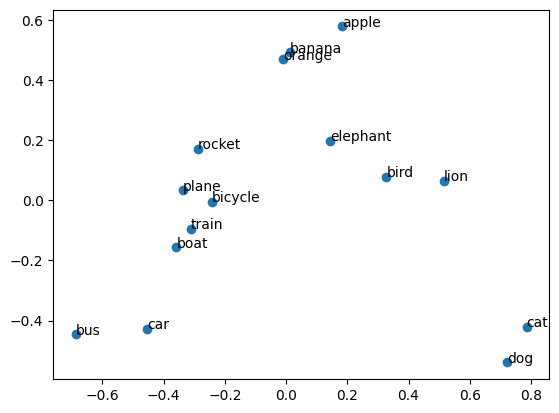

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

word_list = ['cat', 'dog', 'bird', 'elephant', 'lion', 'banana', 'apple', 'orange', 'car', 'bus',
             'train', 'plane', 'bicycle', 'boat', 'rocket']

word_vectors = []
for word in word_list:
    if word in embeddings:
        word_vectors.append(embeddings[word])
word_vectors = np.array(word_vectors)

pca = PCA(n_components=2)
pca.fit(word_vectors)
pca_word_vectors = pca.transform(word_vectors)

plt.scatter(pca_word_vectors[:, 0], pca_word_vectors[:, 1])
for i, word in enumerate(word_list):
    plt.annotate(word, xy=(pca_word_vectors[i, 0], pca_word_vectors[i, 1]))
plt.show()


6. Retrieve 10 movie reviews (or 50 sentences) from the IMDB reviews corpus in NLTK. Extract embedding vectors for each word, then perform k-means clustering using a similarity measure between the vectors (cosine similarity, or the similarity function provided by gensim), and different values for k (k=3,5,) to cluster similar words together. Ignore words which are not found in the embedding space. What clusters do you get?

In [ ]:
nltk.download('movie_reviews')
nltk.download('punkt')
corpus = nltk.corpus.movie_reviews

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import re
from nltk.tokenize import word_tokenize
import numpy as np
from sklearn.cluster import KMeans

reviews = corpus.fileids()[:10]

words = []

for rev in reviews:
    review = str(corpus.raw(rev))
    review = re.sub(r'[^\w\s]', '', review)
    review_words = [word.lower() for word in word_tokenize(review) if word.isalpha()]
    for word in review_words:
        if word not in words and word in embeddings:
            words.append(word)

embeddings_filtered = [embeddings[word] for word in words]
cosine_similarities = np.dot(embeddings_filtered, np.transpose(embeddings_filtered))
kmeans = KMeans(n_clusters=5).fit(cosine_similarities)

for i in range(5):
    cluster_words = [words[j] for j in np.where(kmeans.labels_ == i)[0]]
    print(i, ":", cluster_words)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0 : ['accident', 'girlfriend', 'nightmares', 'mindfuck', 'generation', 'generally', 'downshifts', 'characters', 'apparitions', 'disappearances', 'explained', 'personally', 'completely', 'entertaining', 'thrilling', 'meantime', 'strangeness', 'password', 'understanding', 'melissa', 'throughout', 'offering', 'apparently', 'director', 'themselves', 'somewhere', 'although', 'character', 'american', 'neighborhood', 'unraveling', 'confusing', 'redundant', 'runtime', 'explanation', 'packaged', 'production', 'elm', 'salvation', 'starring', 'curtis', 'regarding', 'tugboat', 'sequences', 'substance', 'sutherland', 'drunkenly', 'halloween', 'cgi', 'occasional', 'otherwise', 'invention', 'television', 'criminals', 'undercover', 'immediately', 'suspicion', 'fifteen', 'costumes', 'described', 'hourlong', 'everything', 'weve', 'spectacular', 'sometimes', 'bordering', 'omar', 'transfers', 'relatively', 'unscathed', 'giovanni', 'resident', 'ultimately', 'unfortunately', 'convoluted', 'occupying', 'soun

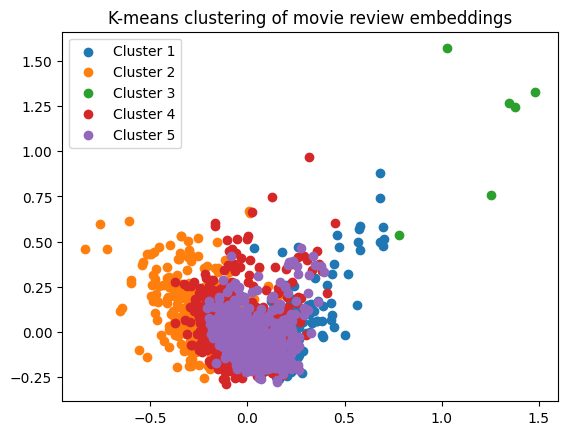

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_filtered)

for i in range(5):
    cluster_embeddings = embeddings_2d[kmeans.labels_ == i]
    plt.scatter(cluster_embeddings[:, 0], cluster_embeddings[:, 1], label=f"Cluster {i+1}")

plt.legend()
plt.title("K-means clustering of movie review embeddings")
plt.show()
